In [1]:
#-------------------------------------------------------
# 라이브러리 로드 & 데이터 불러오기
#-------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# figure 기본 해상도 120 dpi로 설정
plt.rcParams["figure.dpi"] = 120

# Train, Test data csv로 불러와 변수에 저장
TRAIN_CSV = "/content/data files/train.csv"
TEST_CSV = "/content/data files/train.csv"

# 불러온 데이터 읽기
train = pd.read_csv(TRAIN_CSV)
test = pd.read_csv(TEST_CSV)
# (행 수, 열 수) 출력
print(f"train.shape = {train.shape}, test.shape = {test.shape}")
# 상위 5행 미리보기
train.head()

train.shape = (3000, 18), test.shape = (3000, 18)


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


=> Train, Test 데이터 각각 3000개의 데이터와 18개 열 항목이 있는 것을 확인할 수 있다.

In [2]:
#-------------------------------------------------------
# 데이터 타입 / 결측치 비율 / 기본 통계
#-------------------------------------------------------
def missing_ratio(df):
  # isna() : NA 여부 반환
  # mean() : 열 별로 1 (결측치 아닌 값) 평균 = 결측치 비율
  # *100 : % 변환
  # 시리즈 이름을 %missing으로 바꿈
  return (df.isna().mean()*100).round(2).rename("%missing")
# 데이터프레임 생성
info = pd.DataFrame({
    "dtype"     : train.dtypes, # 1열 = 데이터 타입
    "%missing"  : missing_ratio(train),   # 2열 = 열별 결측치 비율
    "n_unique"  : train.nunique()   # 열별 고유값 개수
})
display(info.sort_values("%missing",ascending=False))
# 수치형 변수 기본 통계(개수, 평균, 표준편차, 최소/최대값 등)
display(train.describe().T)
# 범주형 변수 빈도 상위 5개씩
# one-hot encoding 전이기 때문에 문자열 = 범주형 변수
# columns = 열 이름 출력
cat_cols = train.select_dtypes("object").columns.drop(["ID"])
for col in cat_cols:
  # 변수명 출력
  print(f"\n>> {col}")
  # 열별 고유값 개수 출력
  # .value_counts() : 각 고유값이 등장한 개수
  display(train[col].value_counts())

,dtype,%missing,n_unique
family_medical_history,object,49.53,3
medical_history,object,42.97,3
mean_working,float64,34.40,13
edu_level,object,20.23,3
gender,object,0.00,2
ID,object,0.00,3000
age,int64,0.00,73
height,float64,0.00,1828
weight,float64,0.00,1986
cholesterol,float64,0.00,2215


,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00



>> gender


,count
gender,
F,1508
M,1492



>> activity


,count
activity,
moderate,1431
light,894
intense,675



>> smoke_status


,count
smoke_status,
ex-smoker,1177
non-smoker,1039
current-smoker,784



>> medical_history


,count
medical_history,
high blood pressure,697
heart disease,508
diabetes,506



>> family_medical_history


,count
family_medical_history,
diabetes,615
high blood pressure,480
heart disease,419



>> sleep_pattern


,count
sleep_pattern,
normal,1557
sleep difficulty,1019
oversleeping,424



>> edu_level


,count
edu_level,
high school diploma,924
bachelors degree,880
graduate degree,589


=> 데이터 타입과 기초 통계량을 출력한 결과, 범주형 변수는 object 타입, 수치형 변수는 int와 float 타입으로 나타나는 것을 확인할 수 있다. 또한 각 변수별 고유값의 개수(범주형 변수의 경우 응답 유형의 개수)와, 범주형 변수별 데이터 개수를 확인할 수 있다.

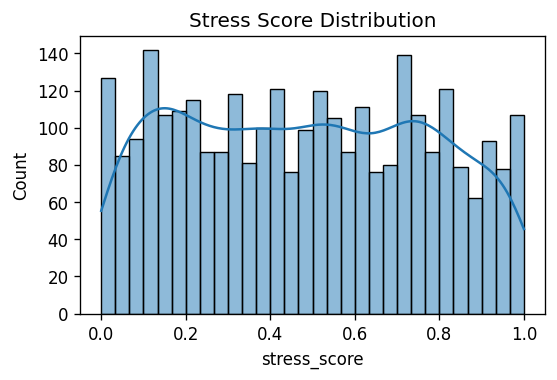

count    3000.000000
mean        0.482130
std         0.288252
min         0.000000
25%         0.230000
50%         0.480000
75%         0.730000
max         1.000000
Name: stress_score, dtype: float64


In [3]:
#-------------------------------------------------------
# 타깃(스트레스 지수) 분포 확인
#-------------------------------------------------------
plt.figure(figsize=(5,3))
# 그래프 객체 생성, 사이즈 = 가로 5인지 * 세로 3인치

sns.histplot(train["stress_score"], kde=True, bins = 30)
# 스트레스 지수의 빈도를 나타내는 히스토그램 생성
# kernel density estimation 함께 생성
# 히스토그램 구간(bin) 30개로 나눔

plt.title("Stress Score Distribution")
plt.show()

print(train["stress_score"].describe())

=> 우선 타겟 변수인 "스트레스 지수" 에 대한 빈도 분석과 기초 통계량을 구해보면 위와 같다.

스트레스 지수의 빈도는 정규분포를 나타내지 않지만, 크게 편향되어있지 않고 고르게 분포해 있음을 볼 수 있다. 또한 0, 1 (극단값) 또한 존재하는 것을 확인할 수 있다.

분포가 균등하여 회귀 모델이나 분류(구간 나눔)이 가능하며, 구간을 구분 시 각 구간 별로 충분한 데이터가 들어갈 수 있다.

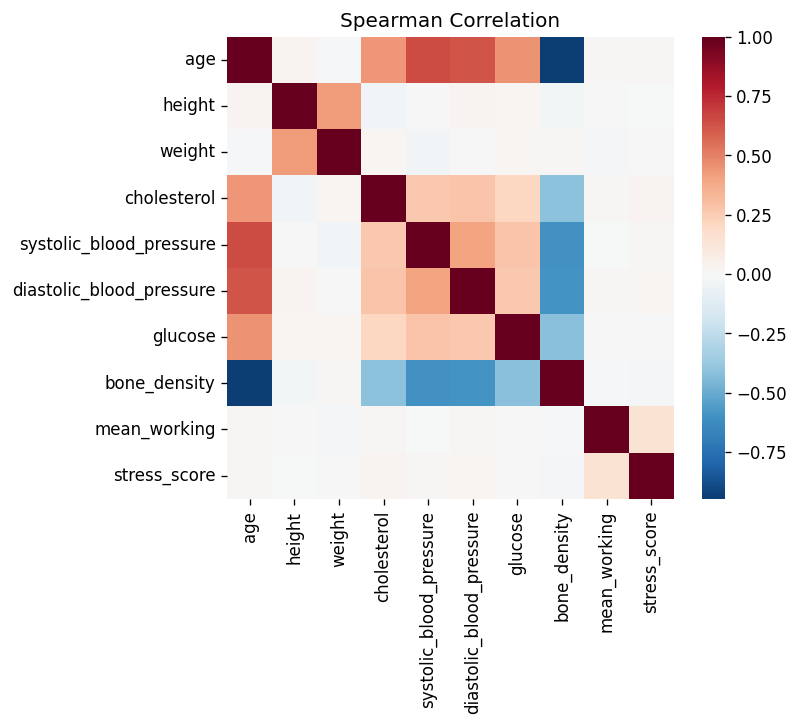

,stress_score
stress_score,1.000000
mean_working,0.145073
cholesterol,0.026804
diastolic_blood_pressure,0.019255
age,0.019001
systolic_blood_pressure,0.017789
weight,0.007825
glucose,-0.003056
height,-0.010767
bone_density,-0.022841


In [4]:
#-------------------------------------------------------
# 수치형 변수와 타깃 변수 간의 상관관계
#-------------------------------------------------------

num_cols = train.select_dtypes(include=[np.number]).columns.drop(["stress_score"])
# 수치형 변수 선택
# .columns : 열 이름만 출력
# 스트레스 지수 제외

corr = train[num_cols.tolist() + ["stress_score"]].corr(method="spearman")
# 스피어만 상관계수 구하기
# 열 이름을 리스트로 변환
# 타깃인 스트레스 지수 다시 붙여서 상관계수 구하기

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
# 히트맵 생성
# annot = False : 네모칸 안에 상관계수 넣지 않음
# 빨간색 - 파란색 반전
# center = 0 : 색상 채울 때 0을 기준으로 양수면 빨강, 음수면 파랑

plt.title("Spearman Correlation")
plt.show()

corr["stress_score"].sort_values(ascending=False)


=> 스트레스 지수와 수치형 변수는 거의 상관관계가 없다.
mean_working 변수는 상관계수가 약 0.15로 약한 양의 상관 관계가 있고, 나머지 변수는 거의 상관관계가 없다.

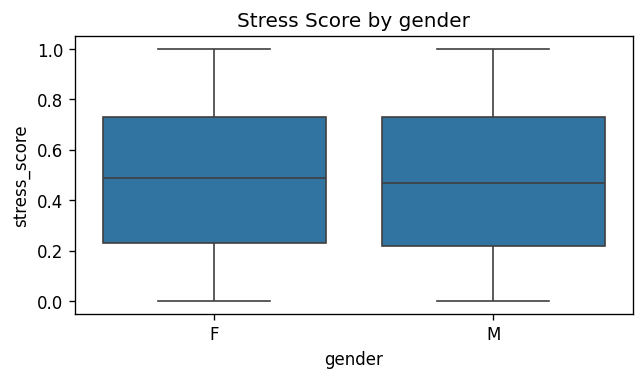

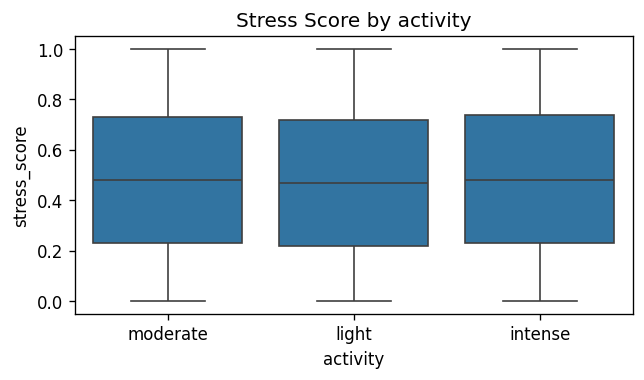

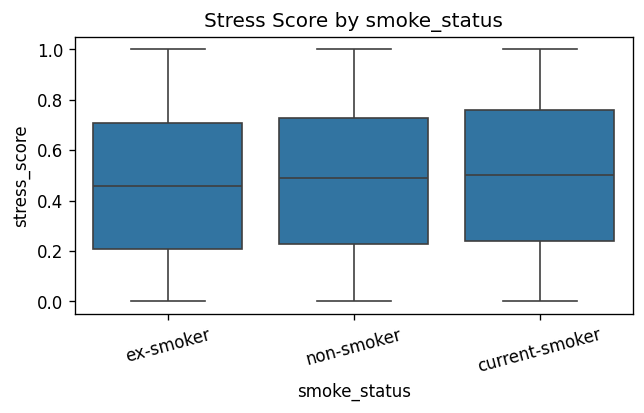

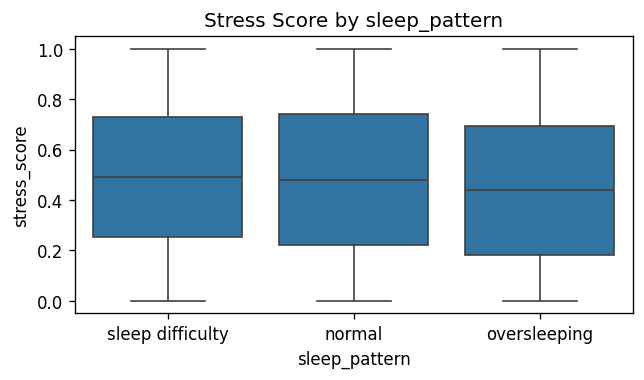

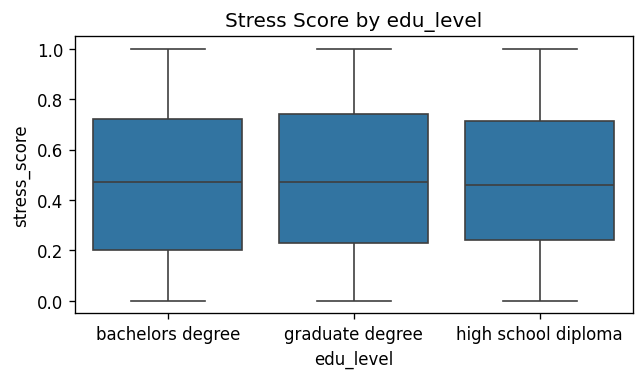

In [5]:
#-------------------------------------------------------
# 범주형 변수와 타깃 변수의 상관관계
#-------------------------------------------------------

def cat_box(col, rotate=0):
  plt.figure(figsize=(6,3))
  sns.boxplot(data=train, x=col, y="stress_score")
  # 박스플롯 생성
  # x축은 선택한 범주형 변수, y축은 스트레스 지수
  plt.title(f"Stress Score by {col}")
  plt.xticks(rotation=rotate)
  # 변수명이 길 경우 회전
  plt.show()

cat_box("gender")
cat_box("activity")
cat_box("smoke_status", rotate=15)
cat_box("sleep_pattern")
cat_box("edu_level")

=> 범주형 변수와 스트레스 지수간의 상관관계를 박스플롯으로 나타내도, 크게 상관관계가 발견되는 변수가 없다. 모든 변수의 박스 중앙값이 비슷하고, 박스의 폭과 수염의 길이 등 시각적 차이가 유의미하게 발견되지 않는다.

<Figure size 1200x480 with 0 Axes>

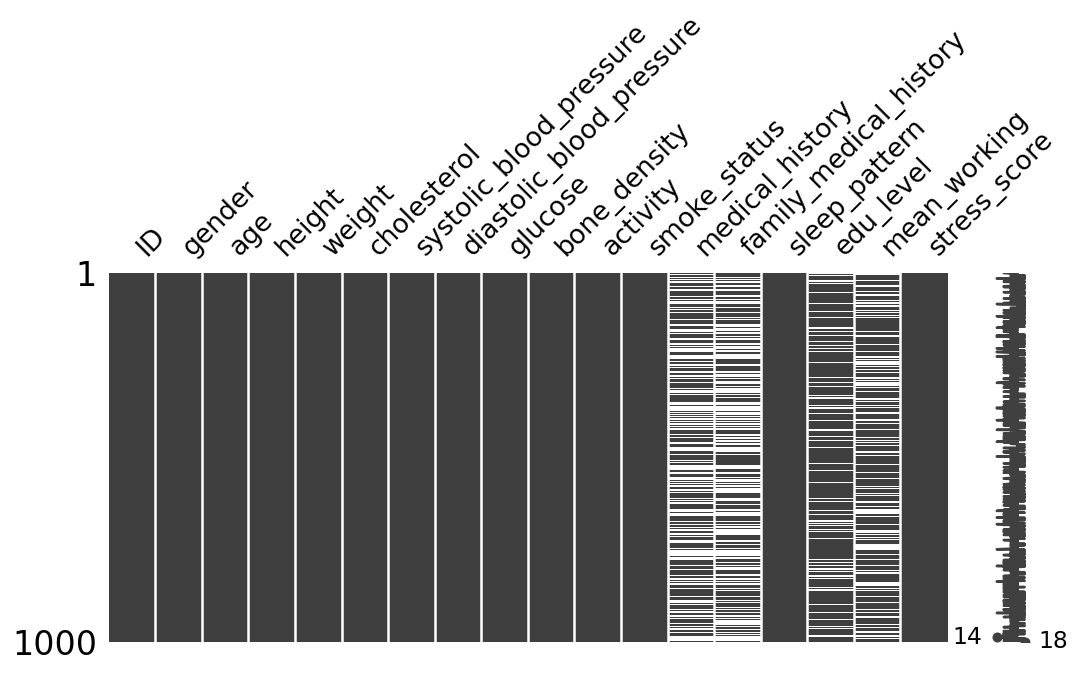

<Figure size 720x360 with 0 Axes>

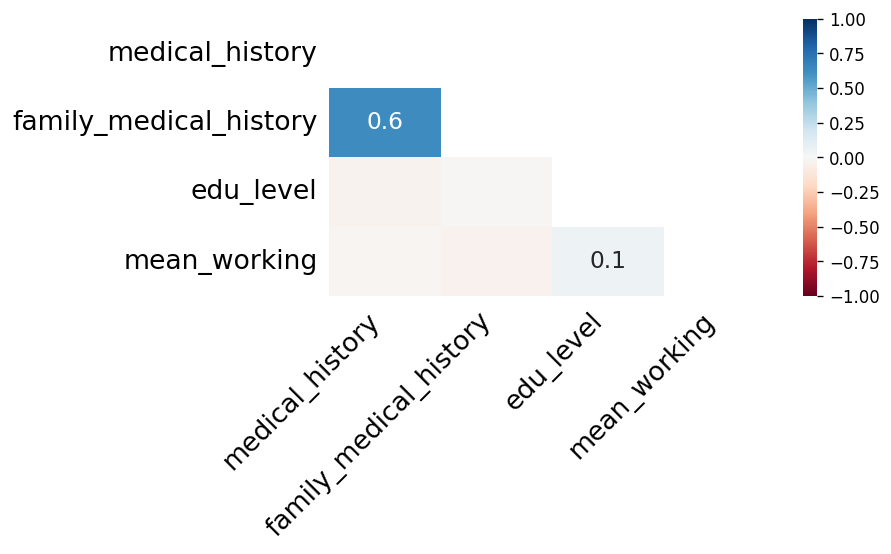

In [6]:
#-------------------------------------------------------
# 결측치 패턴 시각화
#-------------------------------------------------------

import missingno as msno

plt.figure(figsize=(10,4))
msno.matrix(train.sample(1000), figsize=(10,4))
plt.show()

plt.figure(figsize=(6,3))
msno.heatmap(train, figsize=(6,3))
plt.show()

=> 결측치 패턴을 시각화한 결과, 대부분의 변수에서는 결측치가 발견되지 않는다. medical_history와 family_medical_history 변수에서 집중적으로 결측치가 있음을 발견할 수 있다.
변수 간 피어슨 상관관계를 히트맵에 나타내었을때, medical_history와 family_medical_history 변수 간 상관관계가 높게 나타난다. 의료 기록이 결측치일 경우 가족의 의료 기록 또한 결측일 가능성이 높음을 의미한다.

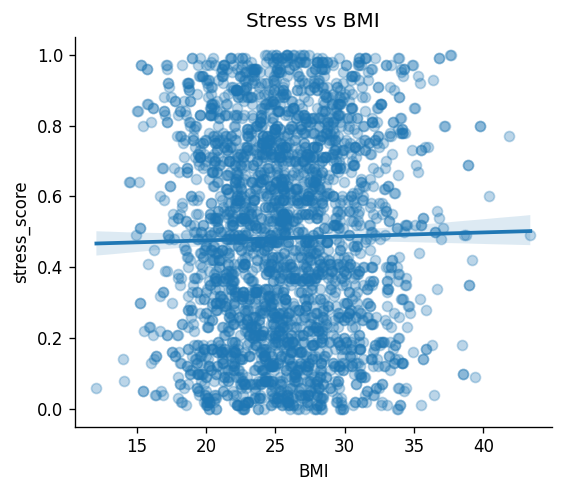

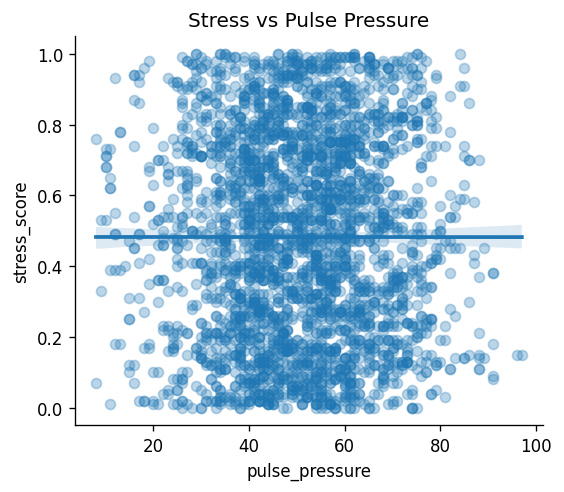

In [7]:
#-------------------------------------------------------
# 파생변수 생성, 타깃과의 관계 확인
#-------------------------------------------------------
# 체중과 키 정보 -> BMI 생성 가능
# 수축 혈압 - 이완 혈압 -> 맥압 생성 가능

# 파생 변수 생성 함수
def add_features(df):
  df["BMI"] = df["weight"] / (df["height"]/100)**2
  df["pulse_pressure"] = df["systolic_blood_pressure"] - df["diastolic_blood_pressure"]
  return df

train = add_features(train)
test = add_features(test)

# 여러 열을 한번에 전달할 때는 리스트 형태로 전달해야 함
train[["BMI","pulse_pressure","stress_score"]].describe().T

# 파생 변수와 타겟 변수 간의 관계 확인
# 산점도를 나타내고 회귀선을 그려서 타깃 변수와의 관계 빠르게 파악
sns.lmplot(data=train, x="BMI",
           y="stress_score",
           height=4,    # 세로 4인치
           aspect=1.2,  # 세로 대비 가로 비율(1보다 크면 가로로 넓게)
           scatter_kws=dict(alpha=0.3))   # 산점도의 점 투명도를 0.3으로 설정 -> 겹치는 부분 확인 용이
plt.title("Stress vs BMI")
plt.show()

sns.lmplot(data=train,
           x="pulse_pressure",
           y="stress_score",
           height=4,
           aspect=1.2,
           scatter_kws=dict(alpha=0.3))
plt.title("Stress vs Pulse Pressure")
plt.show()

=> 몸무게와 키 변수를 가지고 BMI 변수를 만들 수 있고, 수축기 혈압과 이완기 혈압을 이용하여 맥압 변수를 만들 수 있다. 만들어진 변수와 스트레스 지수 간의 상관관계를 빠르게 확인하기 위해 산점도를 그리고 회귀선을 나타낸 결과, BMI와 맥압 모두 스트레스 지수 전반에 고르게 분포되어 있으며, 회귀선 또한 기울기가 0에 가까운 것을 확인할 수 있다. 이를 통해 BMI와 맥압 변수 모두 스트레스 지수와 유의미한 상관관계가 없음을 확인할 수 있다.

In [8]:
#-------------------------------------------------------
# 결측값 처리, 범주형 변수 원핫 인코딩
#-------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder   # 원핫인코더
from sklearn.compose import ColumnTransformer   # 컬럼 그룹별 따로 전처리
from sklearn.pipeline import Pipeline   # 변환기 순서대로 연결
from sklearn.impute import SimpleImputer  # 수치형 변수 결측치 처리 (중앙값으로 대체)

from sklearn.linear_model import ElasticNetCV   # L1 / L2 정규화
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

num_cols = train.select_dtypes(include=[np.number]).columns.drop("stress_score")    # 수치형 변수의 열 저장 (스트레스 지수 제외)
cat_cols = train.select_dtypes("object").columns.drop(["ID"])   # 범주형 변수 열 저장 (ID 제외)

preprocess = ColumnTransformer([    # 수치 vs 범주 변수 따로 전처리 적용
    ("num", SimpleImputer(strategy="median"), num_cols),    # 수치형 : 결측치에 중앙값 적용
    ("cat", Pipeline([
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")    # 범주형 변수 : 결측치에 최빈값 적용 -> 모르는 값 무시 (0 적용) ; 파이프라인으로 연결
    ]),cat_cols)
])

X = train.drop(columns=["stress_score"])    # 타깃 변수 제외한 train data 저장
y = train["stress_score"]   # train data의 타깃 변수 저장

cv = KFold(n_splits = 5, shuffle=True, random_state=42)   # Kfold 객체 생성 : 샘플 5개, 무작위로 섞기, 시드 42로 고정
# 파이프라인 연결 : 전처리(수치 vs 범주 변수 구분해서 결측치 적용) -> ElasticNetCV(l1 + l2 정규화 비율 학습)
# train 데이터에 대해 KFold 적용 (5개로 split) -> 각 fold에서 ElasticNetCV 5개 fold 수행
# l1 비율 0.1, 0.5, 0.9 test
model = make_pipeline(preprocess,
                      ElasticNetCV(cv=5, l1_ratio=[.1,.5,.9], random_state=42))

rmse_scores = []    # RMSE 점수 저장 리스트
for tr_idx, vl_idx in cv.split(X):    # train 데이터 5개 fold로 split -> 인덱스 저장 / 각 fold마다 loop 적용
  model.fit(X.iloc[tr_idx], y.iloc[tr_idx])   # train 데이터의 X값, 타깃변수값에 대한 모델 학습
  pred = model.predict(X.iloc[vl_idx])    # validation 데이터에 적용하여 예측
  rmse_scores.append(np.sqrt(mean_squared_error(y.iloc[vl_idx], pred)))   # validation 데이터와 예측값 RMSE 리스트에 저장

print(f"CV RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")   # 전체 RMSE 평균, 표준편차 출력



TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Pipeline(steps=[SimpleImputer(strategy='most_frequent'),
                OneHotEncoder(handle_unknown='ignore')])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't.